# Набор данных о студенческом образе жизни

**Атрибуты датасета**: Идентификатор студента, количество учебных часов в день,время дополнительной активности в день, время сна в день, время социальной активности в день, часы физической активности в день, учебный балл, уровень стресса.

# Загрузка данных и импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

df = pd.read_csv('student_lifestyle_dataset.csv', delimiter=',')
df

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High


# Определение целевого класса

In [ ]:
# Целевой класс
y = df['Stress_Level']
# Признаки
X = df[['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'GPA']]

In [ ]:
X

,Study_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
0,6.9,8.7,2.8,1.8,2.99
1,5.3,8.0,4.2,3.0,2.75
2,5.1,9.2,1.2,4.6,2.67
3,6.5,7.2,1.7,6.5,2.88
4,8.1,6.5,2.2,6.6,3.51
...,...,...,...,...,...
1995,6.5,7.4,2.1,7.8,3.32
1996,6.3,8.8,1.5,4.6,2.65
1997,6.2,6.2,0.8,10.8,3.14
1998,8.1,7.6,3.5,4.1,3.04


In [ ]:
y

,Stress_Level
0,Moderate
1,Low
2,Low
3,Moderate
4,High
...,...
1995,Moderate
1996,Moderate
1997,Moderate
1998,High


# Оценка сбалансированности

Stress_Level
High        1029
Moderate     674
Low          297
Name: count, dtype: int64


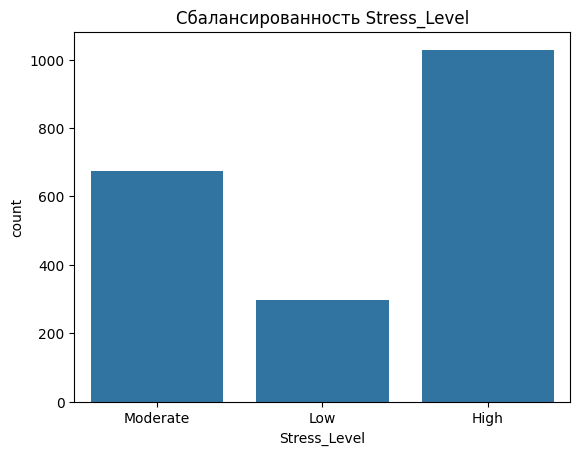

In [ ]:
ax = sns.countplot(data=df, x='Stress_Level').set_title('Сбалансированность Stress_Level')
print(df['Stress_Level'].value_counts())

In [ ]:
smote = SMOTE(random_state=0)
X = df.drop('Stress_Level', axis=1)
y = df['Stress_Level']
X_resampled, y_resampled = smote.fit_resample(X, y)
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Stress_Level'])], axis=1)
print(df_resampled['Stress_Level'].value_counts())

Stress_Level
Moderate    1029
Low         1029
High        1029
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


# Определение обучающей и тестовой выборки

In [ ]:
# Определение обучающей и тестовой выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# kNN, метрики оценки качества

In [ ]:
# Модель k-ближайших соседей (kNN)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Метрики оценки качества для kNN
print("Результаты работы классификатора kNN:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='macro', zero_division=1))
print("Recall:", recall_score(y_test, y_pred_knn, average='macro', zero_division=1))
print("F1-score:", f1_score(y_test, y_pred_knn, average='macro', zero_division=1))
print("ROC:", roc_auc_score(y_test, knn.predict_proba(X_test), multi_class='ovr'))
print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Результаты работы классификатора kNN:
Accuracy: 0.8775
Precision: 0.8605100838674091
Recall: 0.8431801317546509
F1-score: 0.8509323729491797
ROC: 0.5430639488762272




# Дерево решений, метрики оценки качества

In [ ]:
# Модель дерева решений
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Метрики оценки качества для дерева решений
print("Результаты работы классификатора Дерево решений:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree, average='macro', zero_division=1))
print("Recall:", recall_score(y_test, y_pred_tree, average='macro', zero_division=1))
print("F1-score:", f1_score(y_test, y_pred_tree, average='macro', zero_division=1))
print("ROC:", roc_auc_score(y_test, tree.predict_proba(X_test), multi_class='ovr'))

Результаты работы классификатора Дерево решений:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC: 1.0


# Матрица ошибок



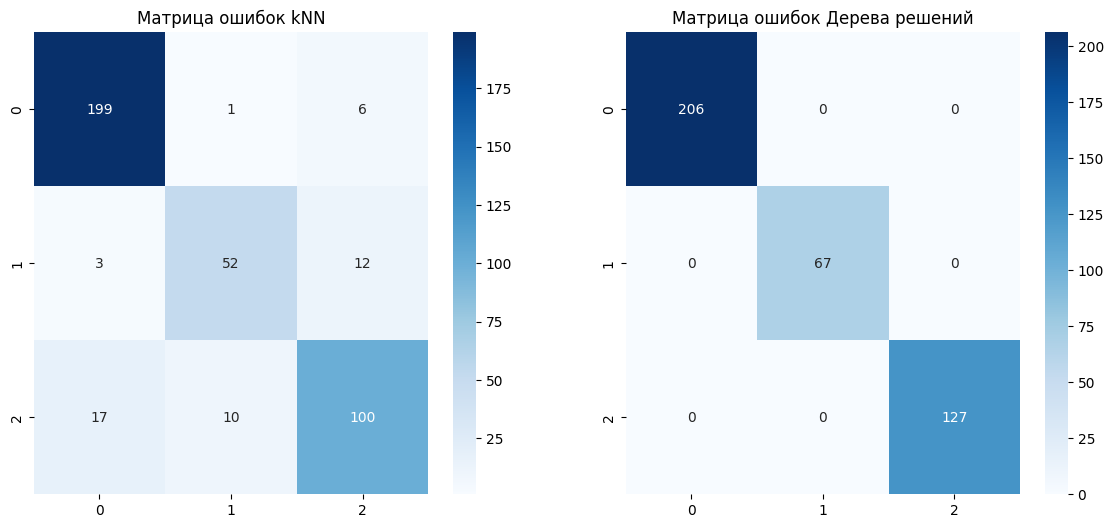

In [ ]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title('Матрица ошибок kNN')

sns.heatmap(conf_matrix_tree, annot=True, fmt="d", cmap="Blues", ax=ax[1])
ax[1].set_title('Матрица ошибок Дерева решений')

plt.show()